In [18]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

In [64]:
#Input parameters: growth constants for domestic wastewater were taken from Metcalf & Eddy (2003)

# Initial biomass concentration (mg/L)
X0= 30.0
# Initial substrate concentration (mg/L)
S0 =  100.0
# Rate mu_max (1/d)
mu_max = 3.0
#Half saturation constant (mg BOD/L)
Ks = 60.0
#Endogenous decay rate constant (1/d)
kd = 0.1
#Yield coeff (mass biomass(mg/L)/mass substrate utilized(mg/L))
Yx_s = 0.6
# Timesteps (days)
t = np.linspace(0, 1.5, 20)

In [65]:
# The model differential equations.
def deriv(y, t, mu_max, Ks, kd, Yx_s):
    X, S = y
    dXdt = ((mu_max*S*X)/(Ks+S))- (kd*X)
    dSdt = -(1/Yx_s)*((mu_max*S*X)/(Ks+S))
    return dXdt, dSdt
# Initial conditions vector
y0 = X0, S0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(mu_max, Ks, kd, Yx_s))
X,S = ret.T

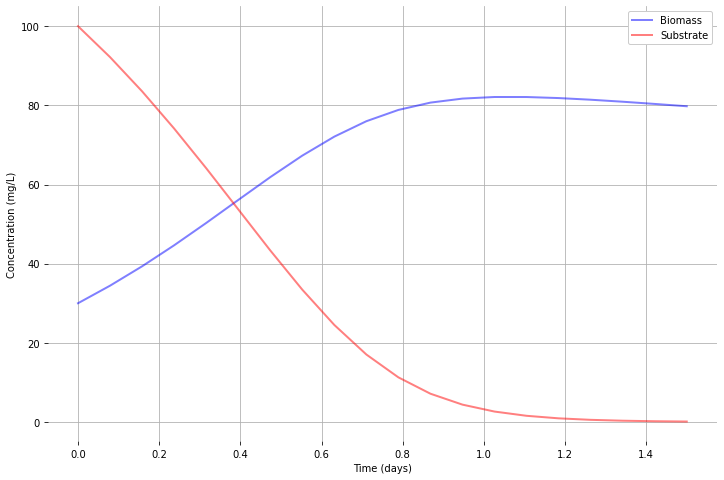

In [66]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(12,8))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, X, 'b', alpha=0.5, lw=2, label='Biomass')
ax.plot(t, S, 'r', alpha=0.5, lw=2, label='Substrate')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Concentration (mg/L)')
ax.yaxis.set_tick_params(length=4)
ax.xaxis.set_tick_params(length=4)
ax.grid(True)
legend = ax.legend()
legend.get_frame().set_alpha(1)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()